In [13]:
%matplotlib inline
import numpy as np
from eddy.fit_cube import rotationmap

# Dynamical Masses

Given the inclination we've measured from the continuum images, we use those as priors for the inclination when fitting the first moment map. The rotation maps were made with `bettermoments` to focus on just the line center.

For these measurements we make the simple assumption that the disk rotation is dominated by Keplerian rotation,

$$v_0 = v_{\rm Kep}(r) \cdot \cos \phi \cdot \sin i$$

where $\phi$ is the disk polar angle and $i$ is the inclination and $v_{\rm Kep} = \frac{GM_{\star}r}{(r^2 + z^2)^{3/2}}$.

Note for this notebook, we've downsampled the image to make it run in a reasonable amount of time.

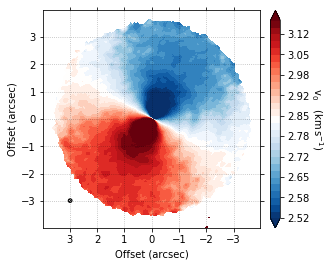

In [6]:
# Load up the data.
cube = rotationmap(path='../data/line/TWHya.12CO_v0.fits',
                   uncertainty='../data/line/TWHya.12CO_dv0.fits',
                   clip=4.0, downsample=5)
cube.plot_data()

When we're fitting the model, we provide an array, `params`, which either gives the fixed value for a particular parameter, or the index of the `theta` array, the values which are sampled. For each of the values we want to sample, we also give a guess at the starting position in the `p0` list. Before the MCMC these will be optimized using `scipy.minimize`. 

We first assume a geometrically thin disk and only fix the distance to the source at 60.1pc. We also do not convolve with the synthesized beam as this is only necessary if the rotation map is made using an intensity weighted average velocity.

In [7]:
params = {}

# Declare the parameters you want to sample and give them
# starting positions.

params['x0'] = 0
params['y0'] = 1
params['inc'] = 2
params['PA'] = 3
params['mstar'] = 4
params['vlsr'] = 5
p0 = [0.0, 0.0, 4.7, 151., 1.0, 2.8e3]

# Fix the other parameters.

params['dist'] = 60.1 
params['beam'] = False

# Fit betwee 0.05" and 3.4" to avoid any beam convolution
# effects in the inner disk or noise features at the edge.

r_min = 0.05
r_max = 3.4

# Set a Gaussian prior on inclination from the continuum
# fitting. This is just a simple Gaussian prior with a 
# mean of 4.7 deg and a standard deviation of 0.1 deg.

cube.set_prior('inc', [4.7, 0.1], 'gaussian')

Assuming:
	p0 = [x0, y0, inc, PA, mstar, vlsr].
Optimized starting positions:
	p0 = ['-4.07e-03', '9.86e-03', '5.02e+00', '1.51e+02', '1.09e+00', '2.84e+03']


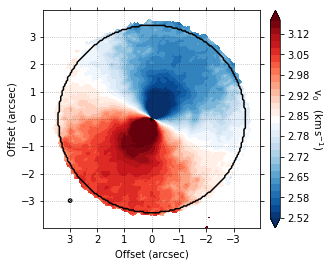

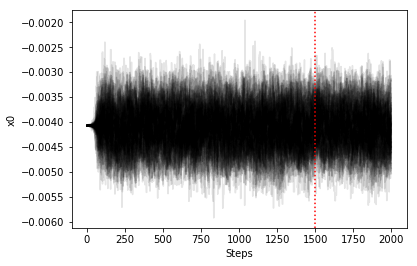

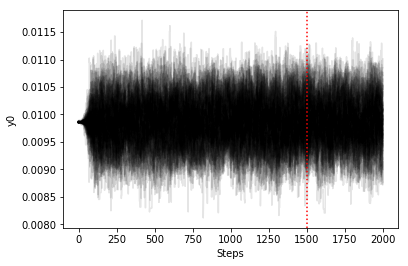

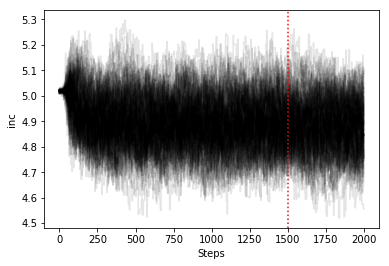

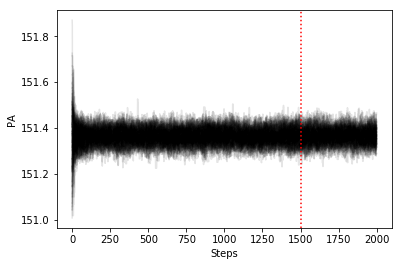

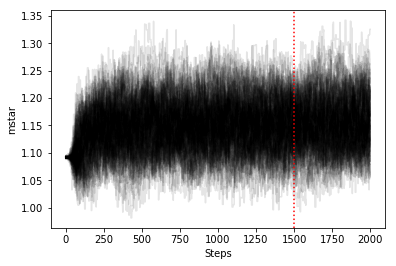

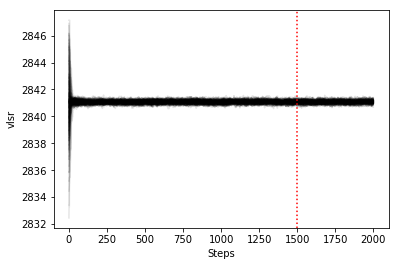

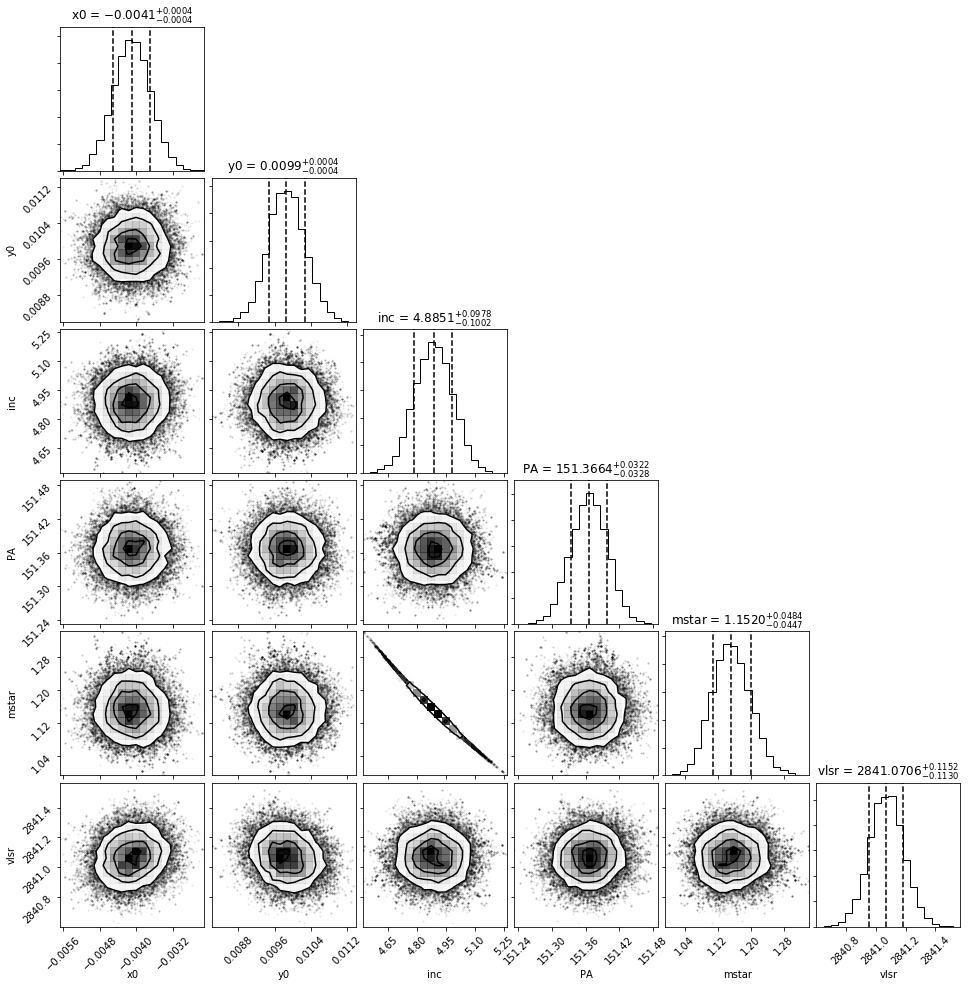

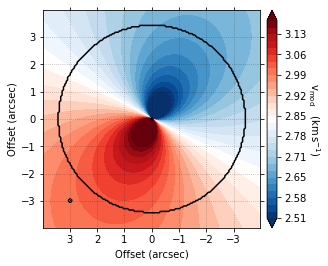

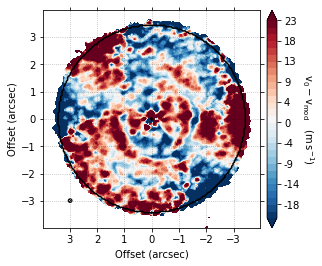

In [9]:
# Let it run. Returns the [16, 50, 84] percentiles of the posteriors and the PDF samples.
percentiles, samples = cube.fit_keplerian(p0=p0, params=params, r_min=r_min, r_max=r_max,
                                          nwalkers=128, nburnin=1500, nsteps=500,
                                          return_dict=False, return_samples=True)
np.save('TWHya.fitv0sample.npy', samples)

We can also check if any flared emission surface will make a difference to this. We parameterize this as a simple power law $z(r) = z_0 \times (r \, / \, 1^{\prime\prime})^{\psi}$. We know that the disk is rotating in the direction of decreasing PA so we set `tilt = -0.5` (for `tilt >= 0`, the rotation is assumed to be in increasing PA).

Assuming:
	p0 = [x0, y0, inc, PA, mstar, vlsr, z0, psi].
Optimized starting positions:
	p0 = ['-9.28e-03', '9.17e-03', '4.94e+00', '1.51e+02', '1.22e+00', '2.84e+03', '2.26e-01', '6.12e-01']


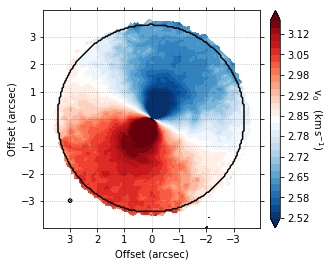

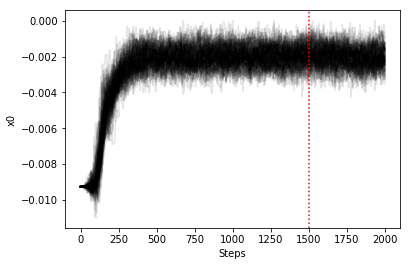

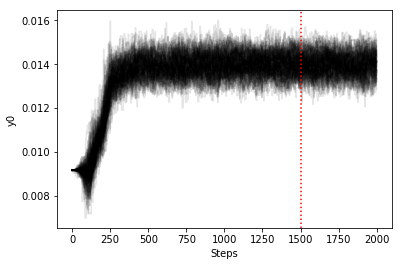

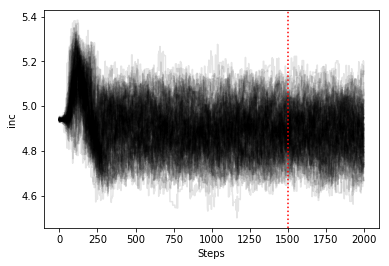

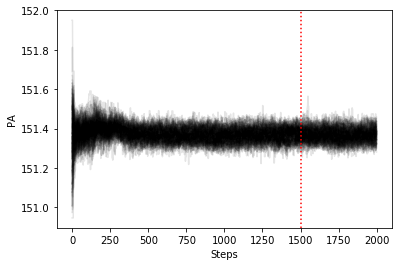

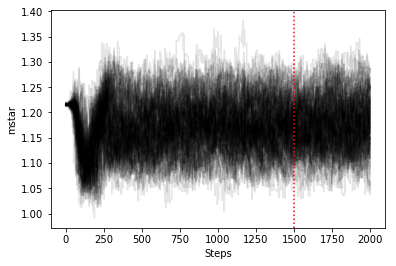

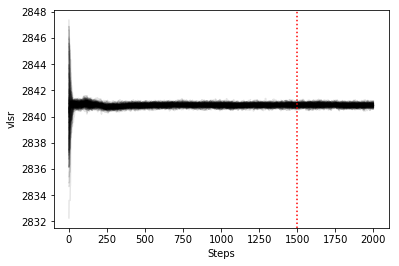

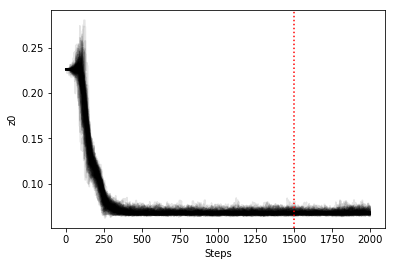

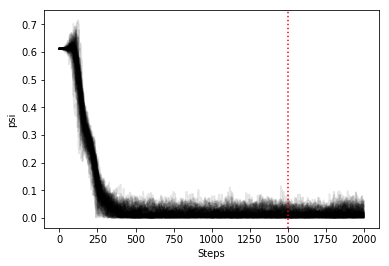

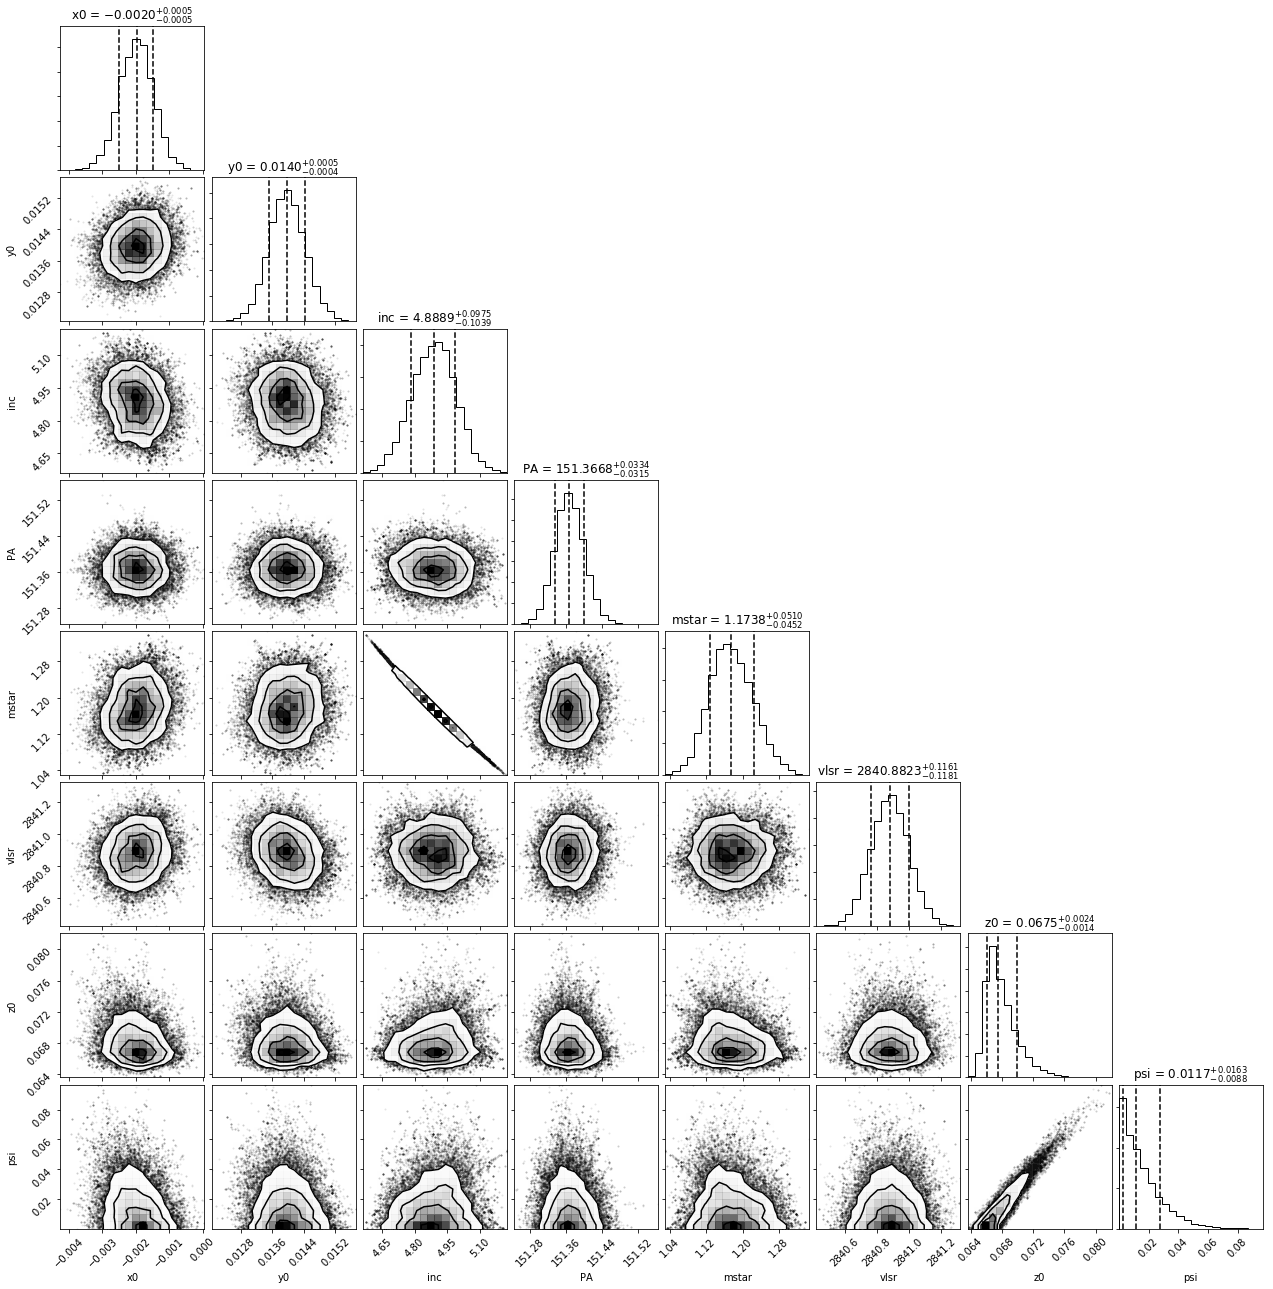

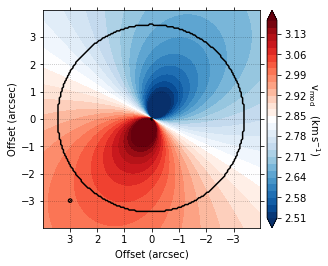

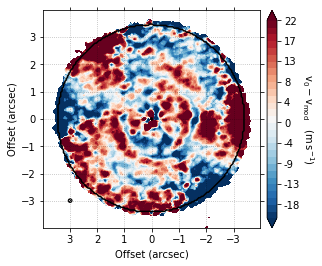

In [15]:
params = {}

# Declare the parameters you want to sample and give them
# starting positions.

params['x0'] = 0
params['y0'] = 1
params['inc'] = 2
params['PA'] = 3
params['mstar'] = 4
params['vlsr'] = 5
params['z0'] = 6
params['psi'] = 7

p0 = [-4e-3, 1e-3, 4.7, 151., 1.15, 2.84e3, 0.2, 0.75]

# Fix the other parameters.

params['tilt'] = -0.5
params['dist'] = 60.1 
params['beam'] = False

# Fit betwee 0.05" and 3.4" to avoid any beam convolution
# effects in the inner disk or noise features at the edge.

r_min = 0.05
r_max = 3.4

# Set a Gaussian prior on inclination from the continuum
# fitting. This is just a simple Gaussian prior with a 
# mean of 4.7 deg and a standard deviation of 0.1 deg.

cube.set_prior('inc', [4.7, 0.1], 'gaussian')

# Let it run. Returns the [16, 50, 84] percentiles of the posteriors and the PDF samples.

percentiles, samples = cube.fit_keplerian(p0=p0, params=params, r_min=r_min, r_max=r_max,
                                          nwalkers=128, nburnin=1500, nsteps=500,
                                          return_dict=False, return_samples=True)
np.save('TWHya.fitv0sample.flared.npy', samples)

Assuming:
	p0 = [x0, y0, inc, PA, mstar, vlsr, z0, psi].
Starting positions:
	p0 = ['4.33e-03', '1.55e-02', '4.86e+00', '1.52e+02', '1.21e+00', '2.85e+03', '1.87e-01', '7.37e-01']


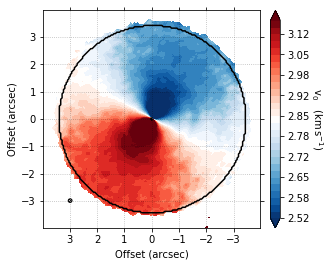

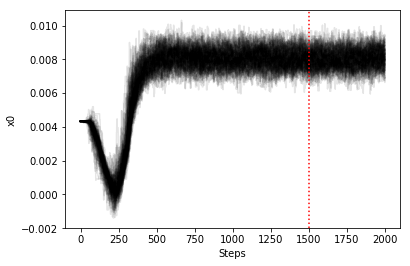

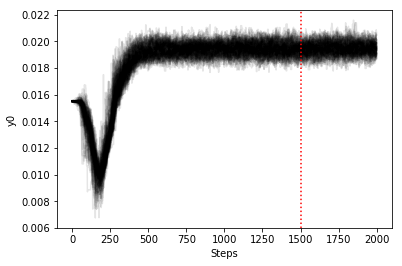

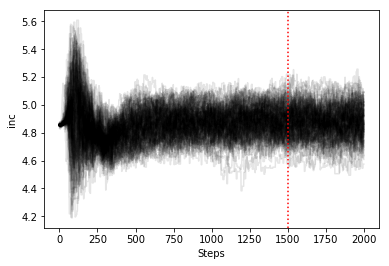

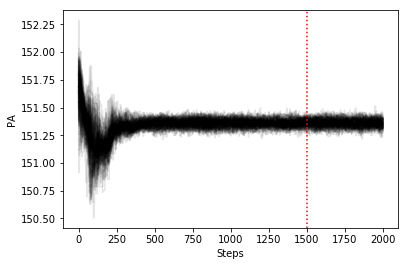

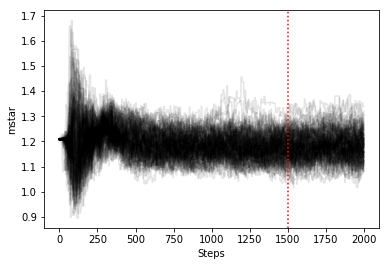

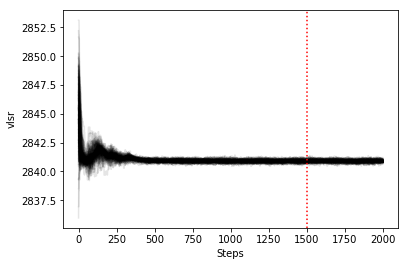

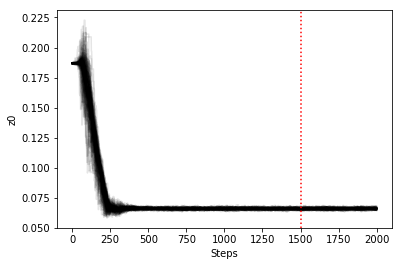

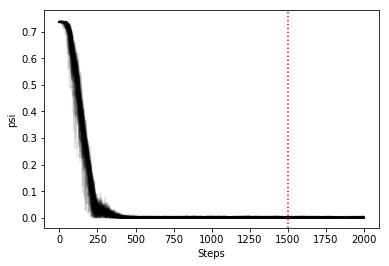

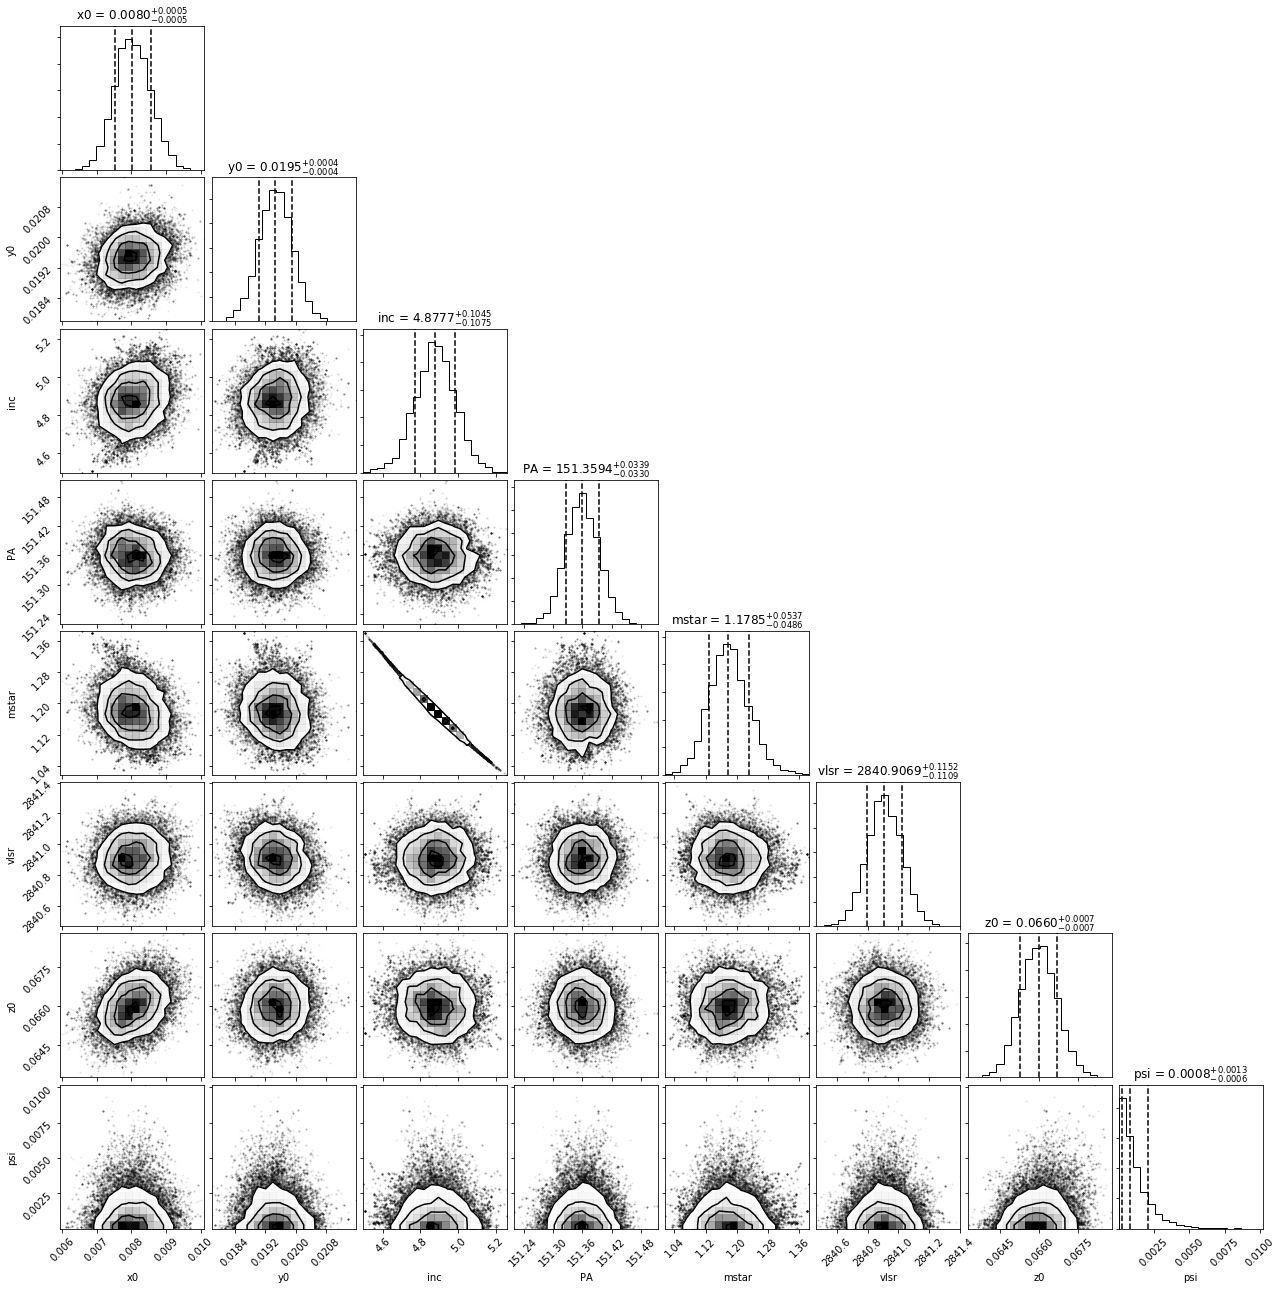

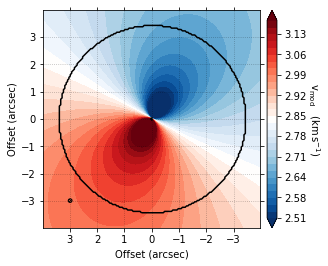

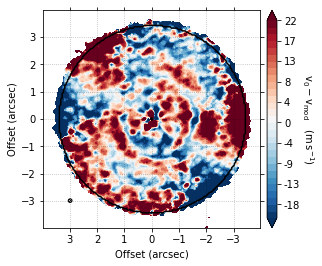

In [16]:
params = {}

# Declare the parameters you want to sample and give them
# starting positions.

params['x0'] = 0
params['y0'] = 1
params['inc'] = 2
params['PA'] = 3
params['mstar'] = 4
params['vlsr'] = 5
params['z0'] = 6
params['psi'] = 7

p0 = [-4e-3, 1e-3, 4.7, 151., 1.15, 2.84e3, 0.2, 0.75]

# Fix the other parameters.

params['tilt'] = 0.5
params['dist'] = 60.1 
params['beam'] = False

# Fit betwee 0.05" and 3.4" to avoid any beam convolution
# effects in the inner disk or noise features at the edge.

r_min = 0.05
r_max = 3.4

# Set a Gaussian prior on inclination from the continuum
# fitting. This is just a simple Gaussian prior with a 
# mean of 4.7 deg and a standard deviation of 0.1 deg.

cube.set_prior('inc', [4.7, 0.1], 'gaussian')

# Let it run. Returns the [16, 50, 84] percentiles of the posteriors and the PDF samples.

percentiles, samples = cube.fit_keplerian(p0=p0, params=params, r_min=r_min, r_max=r_max,
                                          nwalkers=128, nburnin=1500, nsteps=500,
                                          return_dict=False, return_samples=True)
np.save('TWHya.fitv0sample.flared_opposite.npy', samples)